# PISA 2012 Exploration 
## by Maryna Misyura

## Preliminary Wrangling

> This document explores a dataset containing PISA 2012 survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a conventional school test.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.<br>
Dataset is too big. I'll have to filter data and choose only some columns to analize.<br>
First choice for filter column is county

In [31]:
# load in the dataset into a pandas dataframe, print statistics
#encoding='latin-1'
pisa = pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1", index_col=0)
#, usecols =['CNT', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ISCEDD', 'ISCEDL', 'ISCEDO'])


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
pisa.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

(635, 2)

In [104]:
pisa_usa = pisa[pisa.NC == 'United States of America ']
print(pisa_usa.shape)
pisa_canada = pisa[pisa.NC == 'Canada ']
print(pisa_canada.shape)

(10294, 635)
(21544, 635)


In [88]:
pisa[pisa.NC == 'Canada '].shape

(21544, 635)

In [26]:
pisa_usa[['ST07Q03', 'STIDSTD', 'ST01Q01', 'ST02Q01', 'ST05Q01', 'ST06Q01', 'ST07Q01']].head(5)

,ST07Q03,STIDSTD,ST01Q01,ST02Q01,ST05Q01,ST06Q01,ST07Q01
475553,"No, never",1,10,1.0,"Yes, for more than one year",5.0,"No, never"
475554,"No, never",2,10,1.0,"Yes, for more than one year",5.0,"No, never"
475555,NaN,3,9,1.0,"Yes, for more than one year",8.0,"Yes, once"
475556,"No, never",4,11,1.0,"Yes, for more than one year",5.0,"No, never"
475557,"No, never",5,10,1.0,"Yes, for more than one year",6.0,"No, never"


In [ ]:
"PV1MATH","Plausible value 1 in mathematics"
"PV1READ","Plausible value 1 in reading"
"PV1SCIE","Plausible value 1 in science"



In [101]:
pisa_usa.PV1CMAT.value_counts()

AttributeError: 'DataFrame' object has no attribute 'PV1CMAT'

In [98]:
pisa_usa.ST25Q01.unique()

array(['Language of the test', 'Other language', nan], dtype=object)

In [95]:
'CNT' Country
ST03Q01,"Birth - Month"
"ST03Q02","Birth -Year"
"ST04Q01","Gender"
"ST01Q01","International Grade"

"ST20Q01","Country of Birth International - Self"
"ST20Q02","Country of Birth International - Mother"
"ST20Q03","Country of Birth International - Father"
"ST21Q01","Age of arrival in <country of test>"
"ST25Q01","International Language at Home"
"EC07Q01","Language spoken - Mother"
"EC07Q02","Language spoken - Father"

"ST49Q07","Math Behaviour - Computer programming"


"PROGN","Unique national study programme code" (grade 7-9, grade 10-12)


"ST08Q01","Truancy - Late for School"
"ST09Q01","Truancy - Skip whole school day"
"ST115Q01","Truancy - Skip classes within school day"

SyntaxError: invalid syntax (<ipython-input-95-13e81a43bbc9>, line 1)

In [6]:
pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [58]:
pisa.NC.unique()

array(['Albania', 'United Arab Emirates ', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria ', 'Brazil ', 'Canada ',
       'Switzerland', 'Chile', 'Colombia ', 'Costa Rica ',
       'Czech Republic ', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France ', 'United Kingdom (excl.Scotland) ',
       'United Kingdom (Scotland)', 'Greece ', 'Hong Kong-China',
       'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel ',
       'Italy', 'Jordan ', 'Japan', 'Kazakhstan ', 'Republic of Korea',
       'Liechtenstein', 'Lithuania', 'Luxembourg ', 'Latvia ',
       'Macao-China', 'Mexico ', 'Montenegro ', 'Malaysia ',
       'Netherlands', 'Norway ', 'New Zealand', 'Peru ', 'Poland ',
       'Portugal ', 'Qatar', 'China (Shanghai) ',
       'Perm (Russian Federation)', 'United States of America ',
       'Romania', 'Russian Federation ', 'Singapore', 'Serbia ',
       'Slovak Republic', 'Slovenia ', 'Sweden ', 'Chinese Taipei ',
       'Thailand ', 'T

In [55]:
pisa[pisa.CNT == 'Massachusetts (USA)'].head(7)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
410749,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,1,10,1.0,1,...,60.0415,60.0415,24.4250,24.4250,24.4250,24.4250,38,2,0.7813,22NOV13
410750,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,2,10,1.0,11,...,60.0415,60.0415,24.4250,24.4250,24.4250,24.4250,38,2,0.7813,22NOV13
410751,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,3,10,1.0,4,...,60.6444,62.5699,20.2148,20.2148,20.2148,19.5218,38,2,0.7094,22NOV13
410752,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,4,10,1.0,8,...,60.6444,62.5699,20.2148,20.2148,20.2148,19.5218,38,2,0.7094,22NOV13
410753,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,5,10,1.0,4,...,60.0415,60.0415,24.4250,24.4250,24.4250,24.4250,38,2,0.7813,22NOV13
410754,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,6,10,1.0,5,...,60.0415,60.0415,24.4250,24.4250,24.4250,24.4250,38,2,0.7813,22NOV13
410755,Massachusetts (USA),8400300,QUC9797,Non-OECD,United States of America,1,7,10,1.0,6,...,60.6444,62.5699,20.2148,20.2148,20.2148,19.5218,38,2,0.7094,22NOV13


In [69]:
pisa[pisa.NC == 'Singapore'].CNT.count()

5546

In [17]:
#Number of records be country
pisa[['CNT', 'STIDSTD']].groupby('CNT').count().sort_values('CNT', ascending=False)

,STIDSTD
CNT,
Vietnam,4959
Uruguay,5315
United States of America,4978
United Kingdom,12659
United Arab Emirates,11500
...,...
Belgium,8597
Austria,4755
Australia,14481


In [22]:
pisa[['CNT', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ISCEDD', 'ISCEDL', 'ISCEDO']].head(5)

,CNT,ST03Q01,ST03Q02,ST04Q01,ISCEDD,ISCEDL,ISCEDO
0,Albania,2,1996,Female,A,ISCED level 3,General
1,Albania,2,1996,Female,A,ISCED level 3,General
2,Albania,9,1996,Female,A,ISCED level 2,General
3,Albania,8,1996,Female,A,ISCED level 2,General
4,Albania,10,1996,Female,A,ISCED level 2,General


In [74]:
pisa[pisa.NC == 'United States of America '].SUBNATIO.unique()

array([8400100, 8400200, 8400300, 8400000], dtype=int64)

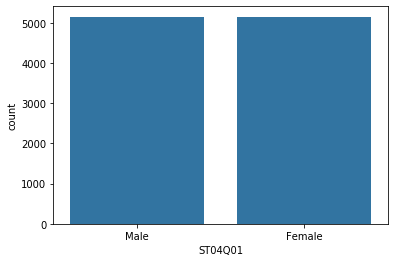

In [82]:
base_color = sb.color_palette()[0]
order = pisa_usa.ST04Q01.value_counts().index
sb.countplot(data=pisa_usa, x='ST04Q01', color =base_color, order = order);
#y= - for horizontal bar
#plt.xticks(rotation = 90)

In [ ]:
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.read_csv.html <br>